# Arboles de regresión y clasificación: modelo

Los **classification and regression trees (CART)** o **árboles de decisión** particionan el espacio de entrada recursivamente y definen un modelo local en cada región resultante. El modelo global es un árbol con una hoja por región.

Dada una entrada $\boldsymbol{x}\in\mathbb{R}^D$, un árbol puede verse como un conjunto de reglas de decisión anidadas. Cada regla de decisión o **nodo interno** define un **split paralelo a un eje**. Más concretamente, cada nodo interno $i$ compara una característica $d_i$ de la entrada con un umbral $t_i$: $\;$ si $\boldsymbol{x}_{d_i}\leq t_i$, $\;\boldsymbol{x}$ se sigue procesando por la rama izquierda; si no, se procesa por la derecha. El procesamiento de $\boldsymbol{x}$ termina al llegar a un nodo hoja. En cada hoja se especifica la salida predicha para toda entrada dentro de su región asociada, esto es, la región acorde con los splits definidos en sus nodos antecesores.

## Árbol de regresión

Un árbol de regresión de $J$ hojas puede expresarse como:
$$f(\boldsymbol{x};\boldsymbol{\theta})=\sum_{j=1}^J w_j\,\mathbb{I}(\boldsymbol{x}\in R_j)$$
donde $R_j$ y $w_j$ denotan la región y salida asociadas a la hoja $j$, y $\;\boldsymbol{\theta}=\{(R_j, w_j): j=1:J\}$. La salida de una hoja puede estimarse como la media de las salidas de los datos de entrenamiento que se encuentran en su región asociada.

**Ejemplo:** $\;$ árbol de regresión para entradas 2d con $4$ nodos internos y $5$ hojas

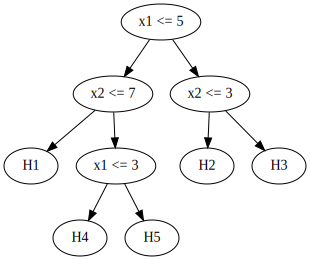

In [1]:
from graphviz import Digraph

t = Digraph()
t.node('N1', 'x1 <= 5'); 
with t.subgraph() as s:
    s.attr(rank='same')
    s.node('N2', 'x2 <= 7')
    s.node('N3', 'x2 <= 3')
with t.subgraph() as s:
    s.attr(rank='same')
    s.node('H1')
    s.node('N4', 'x1 <= 3')
    s.node('H2')
    s.node('H3')
with t.subgraph() as s:
    s.attr(rank='same')
    s.node('H4')
    s.node('H5')
t.edge('N1', 'N2'); t.edge('N1', 'N3')
t.edge('N2', 'H1'); t.edge('N2', 'N4')
t.edge('N3', 'H2'); t.edge('N3', 'H3')
t.edge('N4', 'H4'); t.edge('N4', 'H5')
t

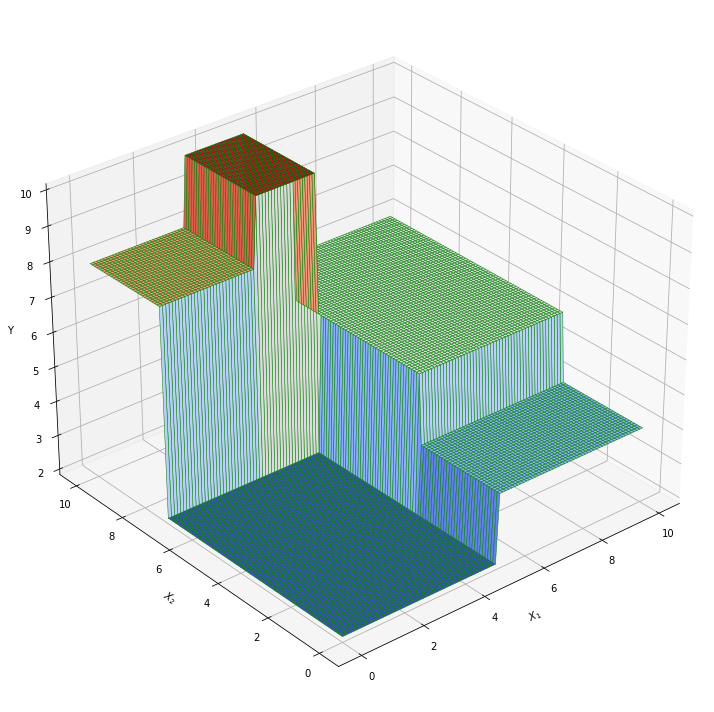

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x11 = 5; x12 = 3; x21 = 7; x22 = 3 # umbrales de corte
# muestreo uniforme de X1 y X2: M/h+1 puntos de 0 a M con incrementos de tamaño h
h = 0.1; M = 10; X1 = X2 = np.arange(0, M + h, h)
L1 = X1 <= x11; R1 = X2 <= x21 # hoja 1
L2 = X1 > x11;  R2 = X2 <= x22 # hoja 2
L3 = X1 > x11;  R3 = X2 > x22  # hoja 3
L4 = X1 <= min(x11, x22); R4 = X2 > x21 # hoja 4
L5 = (X1 <= x11) & (X1 > x12); R5 = X2 > x21 # hoja 5
# árbol: rejilla de X1 x X2 puntos; 
tree = np.zeros((len(X1), len(X2)))
r = np.arange(2, 12, 2) # [ 2  4  6  8 10]
for i in range(len(tree)):
    for j in range(len(tree[0])):
        if L1[i] & R1[j]:
            tree[i, j] = r[0] # salida de la hoja 1
        if L2[i] & R2[j]:
            tree[i, j] = r[1] # salida de la hoja 2
        if L3[i] & R3[j]:
            tree[i, j] = r[2] # salida de la hoja 3
        if L4[i] & R4[j]:
            tree[i, j] = r[3] # salida de la hoja 4
        if L5[i] & R5[j]:
            tree[i, j] = r[4] # salida de la hoja 5
# representación 3d (altura sale aprox.)
X, Y = np.meshgrid(X1, X2, indexing="ij")
ax = plt.figure(figsize=(10, 10)).add_subplot(projection="3d")
ax.plot_surface(X, Y, tree, cmap="coolwarm", lw=0.5, rstride=1, cstride=1, edgecolor=["g"], color="w", antialiased=True)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("Y")
ax.view_init(None, 50 + 180)
plt.tight_layout()

## Árbol de clasificación

En un árbol de clasificación, las hojas contienen una distribución sobre las etiquetas de clase en lugar de una respuesta promedio.